In [1]:
%matplotlib inlineå

In [2]:
import os
import json
import csv
import matplotlib
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [3]:
review_abspath = os.path.abspath("../data/reviews.csv")
user_abspath = os.path.abspath("../data/user.csv")
df_reviews = pd.read_csv(review_abspath)
df_users = pd.read_csv(user_abspath)

In [4]:
df_reviews.head()

,business_id,date,review_id,stars,user_id,votes
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,PUFPaY9KxDAcGqfsorJp3Q,"{'funny': 0, 'cool': 0, 'useful': 0}"
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Iu6AxdBYGR4A0wspR9BYHA,"{'funny': 0, 'cool': 0, 'useful': 0}"
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,auESFwWvW42h6alXgFxAXQ,"{'funny': 1, 'cool': 0, 'useful': 1}"
3,5UmKMjUEUNdYWqANhGckJw,2015-12-26,pVMIt0a_QsKtuDfWVfSk2A,3,qiczib2fO_1VBG8IoCGvVg,"{'funny': 0, 'cool': 0, 'useful': 0}"
4,5UmKMjUEUNdYWqANhGckJw,2016-04-08,AEyiQ_Y44isJmNbMTyoMKQ,2,qEE5EvV-f-s7yHC0Z4ydJQ,"{'funny': 0, 'cool': 0, 'useful': 1}"


In [5]:
df_reviews['year-month'] = df_reviews['date'].apply(lambda x: '-'.join(x.split('-')[0:2])) 
avgrate_count_month= df_reviews.groupby('year-month').agg({'stars':[np.mean,np.size]})
avgrate_count_month[('stars','mean*size')] = avgrate_count_month[('stars','mean')] * avgrate_count_month[('stars','size')]
avgrate_count_month.reset_index(inplace=True)
avgrate_count_month.columns = ['date','avg_stars', 'review_count', 'review_multiply']

In [6]:
avgrate_count_month.head()

,date,avg_stars,review_count,review_multiply
0,2004-10,4.545455,11,50.0
1,2004-12,4.500000,2,9.0
2,2005-01,4.571429,7,32.0
3,2005-02,4.000000,1,4.0
4,2005-03,4.097561,41,168.0


In [7]:
df_users.head()

,average_stars,compliments,elite,fans,friends,name,review_count,user_id,votes,yelping_since
0,4.14,"{'profile': 8, 'writer': 9, 'cute': 15, 'plain...","[2005, 2006]",69,"['rpOyqD_893cqmDAtJLbdog', '4U9kSBLuBDU391x6bx...",Russel,108,18kPq7GPye-YQ3LyKyAZPw,"{'funny': 167, 'cool': 246, 'useful': 282}",2004-10
1,3.67,"{'profile': 117, 'writer': 346, 'list': 38, 'c...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1345,"['18kPq7GPye-YQ3LyKyAZPw', '4U9kSBLuBDU391x6bx...",Jeremy,1292,rpOyqD_893cqmDAtJLbdog,"{'funny': 8399, 'cool': 12091, 'useful': 15242}",2004-10
2,3.68,"{'profile': 9, 'writer': 24, 'list': 4, 'cute'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",105,"['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...",Michael,395,4U9kSBLuBDU391x6bxU-YA,"{'funny': 722, 'cool': 657, 'useful': 1349}",2004-10
3,4.64,{'cute': 2},[],2,"['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...",Ken,11,fHtTaujcyKvXglE33Z5yIw,"{'funny': 1, 'cool': 5, 'useful': 11}",2004-10
4,3.80,"{'writer': 2, 'cute': 2, 'plain': 2, 'cool': 1...",[2005],5,"['rpOyqD_893cqmDAtJLbdog', 'HDQixQ-WZEV0LVPJlI...",Katherine,66,SIBCL7HBkrP4llolm4SC2A,"{'funny': 13, 'cool': 16, 'useful': 37}",2004-10


In [8]:
user_count_month = df_users['yelping_since'].value_counts().to_frame().sort_index()
user_count_month.reset_index(inplace=True)
user_count_month.columns = ['date', 'new_user']

In [9]:
user_count_month.head()

,date,new_user
0,2004-10,37
1,2004-11,6
2,2004-12,15
3,2005-01,18
4,2005-02,25


In [10]:
df_user_review = user_count_month.merge(avgrate_count_month,how='outer').sort_values(by='date').fillna(0)

In [11]:
df_user_review.head()

,date,new_user,avg_stars,review_count,review_multiply
0,2004-10,37,4.545455,11.0,50.0
1,2004-11,6,0.000000,0.0,0.0
2,2004-12,15,4.500000,2.0,9.0
3,2005-01,18,4.571429,7.0,32.0
4,2005-02,25,4.000000,1.0,4.0


In [12]:
df_user_review['date'] = df_user_review['date'].apply(lambda x: datetime.strptime(x, "%Y-%m"))

In [13]:
X = df_user_review['date'].values
Y_review_count = df_user_review.review_count.values
Y_user_count = df_user_review.new_user.values

In [14]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
locator = mdates.AutoDateLocator()
autoFmt = mdates.AutoDateFormatter(locator)

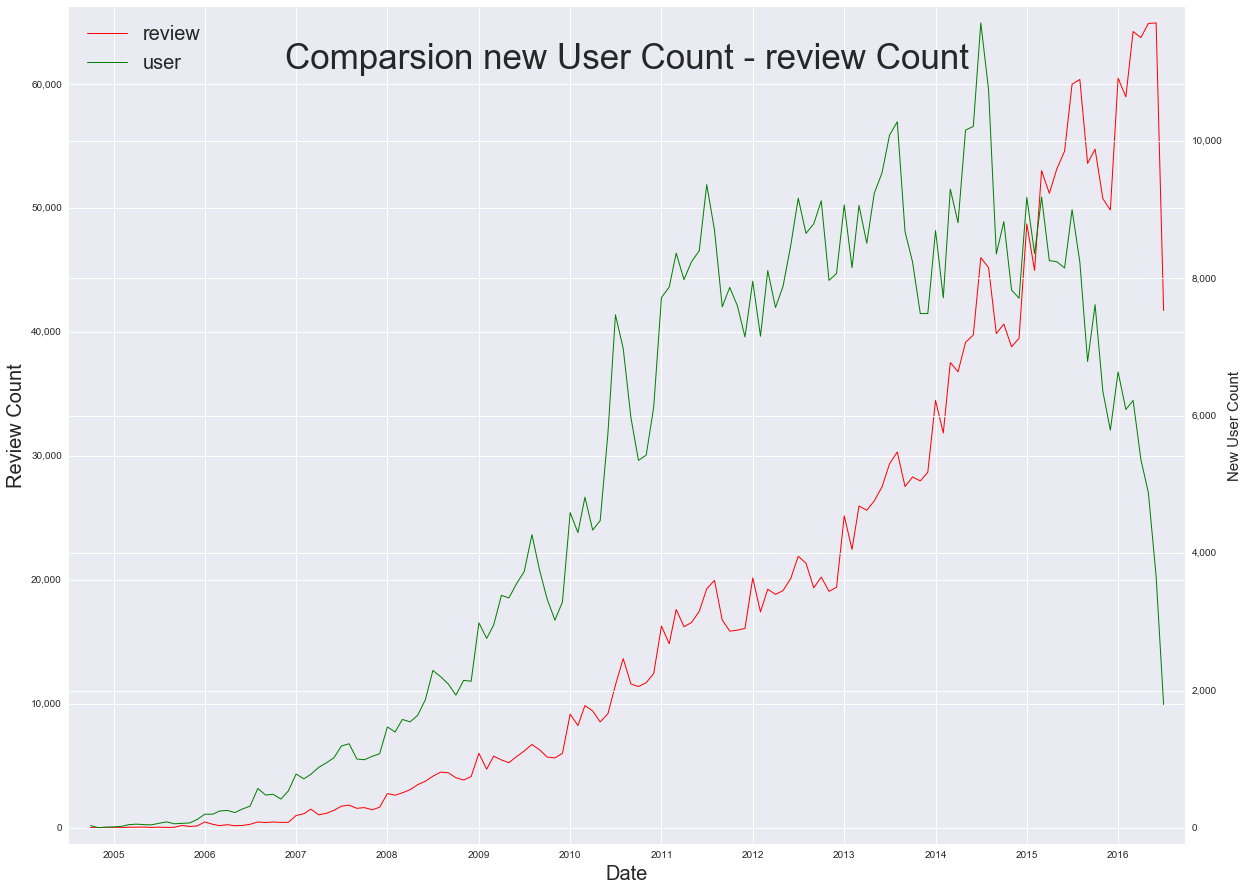

In [21]:
sns.set_style("darkgrid")
fig= plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)
x_axis = np.arange(len(X))

lns1=ax1.plot(X, Y_review_count, color = 'r',linewidth=1.0, linestyle="-",label='review')
ax1.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: format(int(y), ',')))
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(autoFmt)
ax1.set_title('Comparsion new User Count - review Count',x =0.5, y = 0.92, fontsize=35)
ax1.set_xlabel('Date',fontsize=20)
ax1.set_ylabel('Review Count',fontsize=20)
ax1.margins(0.02)

ax2 = ax1.twinx()
lns2=ax2.plot(X, Y_user_count, color = 'g',linewidth=1.0, linestyle="-",label='user')
ax2.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: format(int(y), ',')))
ax2.set_ylabel('New User Count',fontsize=15)
# ax2.set_ylim([0,15000])
ax2.margins(0.02)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0,fontsize=20)

sns.despine(top=True, right=False, left=False, bottom=False)
plt.show()

In [176]:
pd.date_range(start='2004-10', end='2016-8', freq='m')

DatetimeIndex(['2004-10-31', '2004-11-30', '2004-12-31', '2005-01-31',
               '2005-02-28', '2005-03-31', '2005-04-30', '2005-05-31',
               '2005-06-30', '2005-07-31',
               ...
               '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31',
               '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31'],
              dtype='datetime64[ns]', length=142, freq='M')

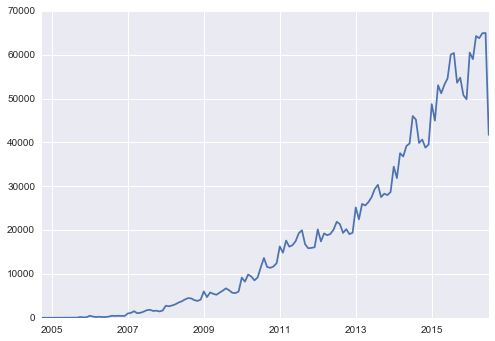

In [177]:
ts = pd.Series(Y_review_count, index=pd.date_range(start='2004-10', end='2016-8', freq='m'))
# ts = ts.cumsum()
ts.plot()

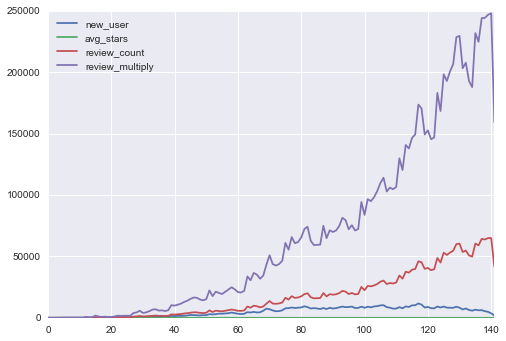

In [137]:
df_user_review.plot()

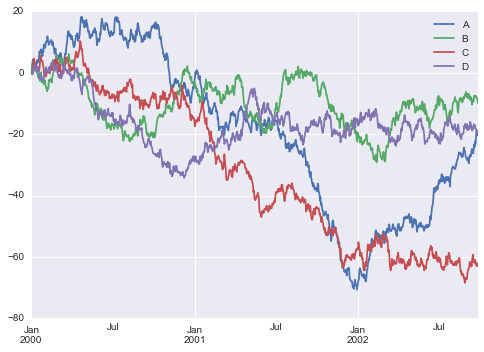

In [193]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot();